# Figure S3: 

**Fig. S3. EKE time series and trends for three different altimetric products.** EKE time series and their trends for the period between 1 January 1993 and 31 December 2019 (maximum available complete year for vDT2018) for three different altimetric products: all-sat (vDT2021), two-sat (vDT2021), two-sat (vDT2018). Area-weighted mean EKE time series computed over (A) the global ocean, (B) the high EKE regions, (C) the tropical band, and (D) the global ocean excluding the high EKE regions and the tropical band (called residual), for the all-sat vDT2021 (red line), two-sat vDT2021 (blue line), two-sat vDT2018 (green line) altimetric products. Thinner lines represent the original data, while thicker lines show the smoothed 365-day running average. (E) Trends of the original area-weighted mean EKE time series shown in (A-D). (F) Trends of the smoothed area-weighted mean EKE time series shown in (A-D). In (E) and (F) significant trends (p < 0.05) are written in bold text, while non-significant trends are written in italics.


### Import libraries

In [1]:
%reload_ext autoreload
%autoreload 2

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.lines as mlines
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import plot_utils
import pymannkendall as mk
from matplotlib.patches import Patch


### Function to calculate trends

In [2]:
def mk_test(ts):
    
    if np.isnan(ts).all():
        return np.nan, np.nan
    results = mk.yue_wang_modification_test(ts)
    slope, p_value = results.slope, results.p
    return slope, p_value

### Open files with the time series of each region

In [3]:
time_max = '2019-12-31'

In [4]:
kinds = ['ALL_SAT', 'TWO_SAT', 'TWO_SAT_C3S_vDT2018']
timeseries = {}
for kind in kinds:
    path_ts = f'../../results/EKE_{kind}/tseries/EKE_{kind}_tseries.nc'
    ds               = xr.open_dataset(path_ts)            
    timeseries[kind] = ds.sel(time=slice(None, time_max))

## Calculate trends for each EKE time series and save values into a list

In [5]:
# Multply by the factor 365 days to convert trends per day to trends per year 
# units from (cm$^2$ s$^{-2}$ day$^{-1}$) to (cm$^2$ s$^{-2}$ y$^{-1}$)
factor = 365

In [6]:
list_slope_all21raw  = []
list_slope_two21raw  = []
list_slope_two18raw  = []

list_pval_all21raw   = []
list_pval_two21raw   = []
list_pval_two18raw   = []

list_slope_all21rol  = [] 
list_slope_two21rol  = []
list_slope_two18rol  = []

list_pval_all21rol   = []
list_pval_two21rol   = []
list_pval_two18rol   = []


In [7]:
    dic_keys = ['no ice', 'high eke', 'tropical', 'remainder']

    for k in range(len(dic_keys)):
            
            print('')
            print('----------------')
            print(dic_keys[k])
            print('----------------')
            
            # ----- ALL-SAT vDT2021 (CMEMS) -----
            # all-sat raw
            all_ts = timeseries['ALL_SAT'][dic_keys[k]]
          
            # all-sat 365 day rolling mean 
            all_ts_roll = all_ts.rolling(time=365, center=True).mean()
 
            # ----- TWO-SAT vDT2021 (CMEMS) -----
            # two-sat raw
            two_ts = timeseries['TWO_SAT'][dic_keys[k]]
            
            # two-sat 365 day rolling mean 
            two_ts_roll = two_ts.rolling(time=365, center=True).mean()
       
            # ----- TWO-SAT vDT2018 (C3S) -----
            # two-sat raw
            two18_ts = timeseries['TWO_SAT_C3S_vDT2018'][dic_keys[k]]
            
            # two-sat 365 day rolling mean 
            two18_ts_roll = two18_ts.rolling(time=365, center=True).mean()
            
            
            # MK test
            slope_allraw,  p_value_allraw      = mk_test(all_ts)
            slope_tworaw,  p_value_tworaw      = mk_test(two_ts)
            slope_two18raw,  p_value_two18raw  = mk_test(two18_ts)
            
            slope_allroll, p_value_allroll     = mk_test(all_ts_roll)            
            slope_tworoll, p_value_tworoll     = mk_test(two_ts_roll) 
            slope_two18roll, p_value_two18roll = mk_test(two18_ts_roll)
            
            # Save into lists
            # raw
            list_slope_all21raw.append(slope_allraw*factor) #(cm$^2$ s$^{-2}$ y$^{-1}$)
            list_slope_two21raw.append(slope_tworaw*factor) #(cm$^2$ s$^{-2}$ y$^{-1}$)
            list_slope_two18raw.append(slope_two18raw*factor) #(cm$^2$ s$^{-2}$ y$^{-1}$)

            list_pval_all21raw.append(p_value_allraw) 
            list_pval_two21raw.append(p_value_tworaw)           
            list_pval_two18raw.append(p_value_two18raw)
            
            #roll
            list_slope_all21rol.append(slope_allroll*factor) #(cm$^2$ s$^{-2}$ y$^{-1}$)
            list_slope_two21rol.append(slope_tworoll*factor) #(cm$^2$ s$^{-2}$ y$^{-1}$)            
            list_slope_two18rol.append(slope_two18roll*factor) #(cm$^2$ s$^{-2}$ y$^{-1}$)
            
            list_pval_all21rol.append(p_value_allroll) 
            list_pval_two21rol.append(p_value_tworoll)             
            list_pval_two18rol.append(p_value_two18roll)

            print(' ')
            print('Yue and Wang Modified MK Test')
            print('trends, p_value')
            print('all-sat raw... ',  slope_allraw*factor,  p_value_allraw)
            print('two-sat vDT2021 raw... ',  slope_tworaw*factor,  p_value_tworaw)
            print('two-sat vDT2018 raw... ',  slope_two18raw*factor,  p_value_two18raw)
            
            print(' ')
            print('all-sat roll... ', slope_allroll*factor, p_value_allroll)            
            print('two-sat vDT2021 roll... ', slope_tworoll*factor, p_value_tworoll)            
            print('two-sat vDT2018 roll... ', slope_two18roll*factor, p_value_two18roll)            

                            


----------------
no ice
----------------
 
Yue and Wang Modified MK Test
trends, p_value
all-sat raw...  0.5782029981363197 1.8134826973437157e-11
two-sat vDT2021 raw...  0.11429220318106213 0.21563082601545158
two-sat vDT2018 raw...  -0.002219062113708006 0.9777796654865765
 
all-sat roll...  0.5752042210642867 4.785565121956381e-08
two-sat vDT2021 roll...  0.15726540039697018 0.1434611567474393
two-sat vDT2018 roll...  0.005936352641371313 0.9428562089989592

----------------
high eke
----------------
 
Yue and Wang Modified MK Test
trends, p_value
all-sat raw...  5.080256033592159 0.0
two-sat vDT2021 raw...  1.5453673313399452 0.00030043395902912273
two-sat vDT2018 raw...  1.0992469993101723 0.0045062155722985775
 
all-sat roll...  5.089890743599263 1.6055061724529196e-08
two-sat vDT2021 roll...  1.3723406499335895 0.0002661325912707291
two-sat vDT2018 roll...  0.9910725705103695 0.00798155388228805

----------------
tropical
----------------
 
Yue and Wang Modified MK Test
trends,

## FIGURE S3

Figure parameters

In [8]:
tseries   = timeseries
fig_size  = 30 
ratio     = 0.75
text_size = 1.1 
extension = 'png'

lw        = 0.15  
legend_pos= ['lower right', 'upper left', 'upper right', 'lower right']
titles    = ['Global', 'High EKE regions', 'Tropics', 'Residual ']
dic_keys  = ['no ice', 'high eke', 'tropical', 'remainder']
    

Bar plot parameters

In [9]:
wdth  = 0.25
ofset = -wdth/1.75
x     = np.array(list(range(4))) 
label_unit = "(cm$^2$ s$^{-2}$ y$^{-1}$)"

Mark non significant trends in the bar plots

In [10]:
threshold = 0.05  

mask_nonsig_all21raw = [r'////' if x > threshold else None for x in list_pval_all21raw]
mask_nonsig_two21raw = [r'////' if x > threshold else None for x in list_pval_two21raw]
mask_nonsig_two18raw = [r'////' if x > threshold else None for x in list_pval_two18raw]

mask_nonsig_all21rol = [r'////' if x > threshold else None for x in list_pval_all21rol]
mask_nonsig_two21rol = [r'////' if x > threshold else None for x in list_pval_two21rol]
mask_nonsig_two18rol = [r'////' if x > threshold else None for x in list_pval_two18rol]

text_style_all21raw  = ['italic' if x > threshold else 'normal' for x in list_pval_all21raw]
text_style_two21raw  = ['italic' if x > threshold else 'normal' for x in list_pval_two21raw]
text_style_two18raw  = ['italic' if x > threshold else 'normal' for x in list_pval_two18raw]

text_style_all21rol  = ['italic' if x > threshold else 'normal' for x in list_pval_all21rol]
text_style_two21rol  = ['italic' if x > threshold else 'normal' for x in list_pval_two21rol]
text_style_two18rol  = ['italic' if x > threshold else 'normal' for x in list_pval_two18rol]

In [11]:
ratio = 0.6
text_size = 1.1 #0.9 #1.1 #1.3

Plot figure 

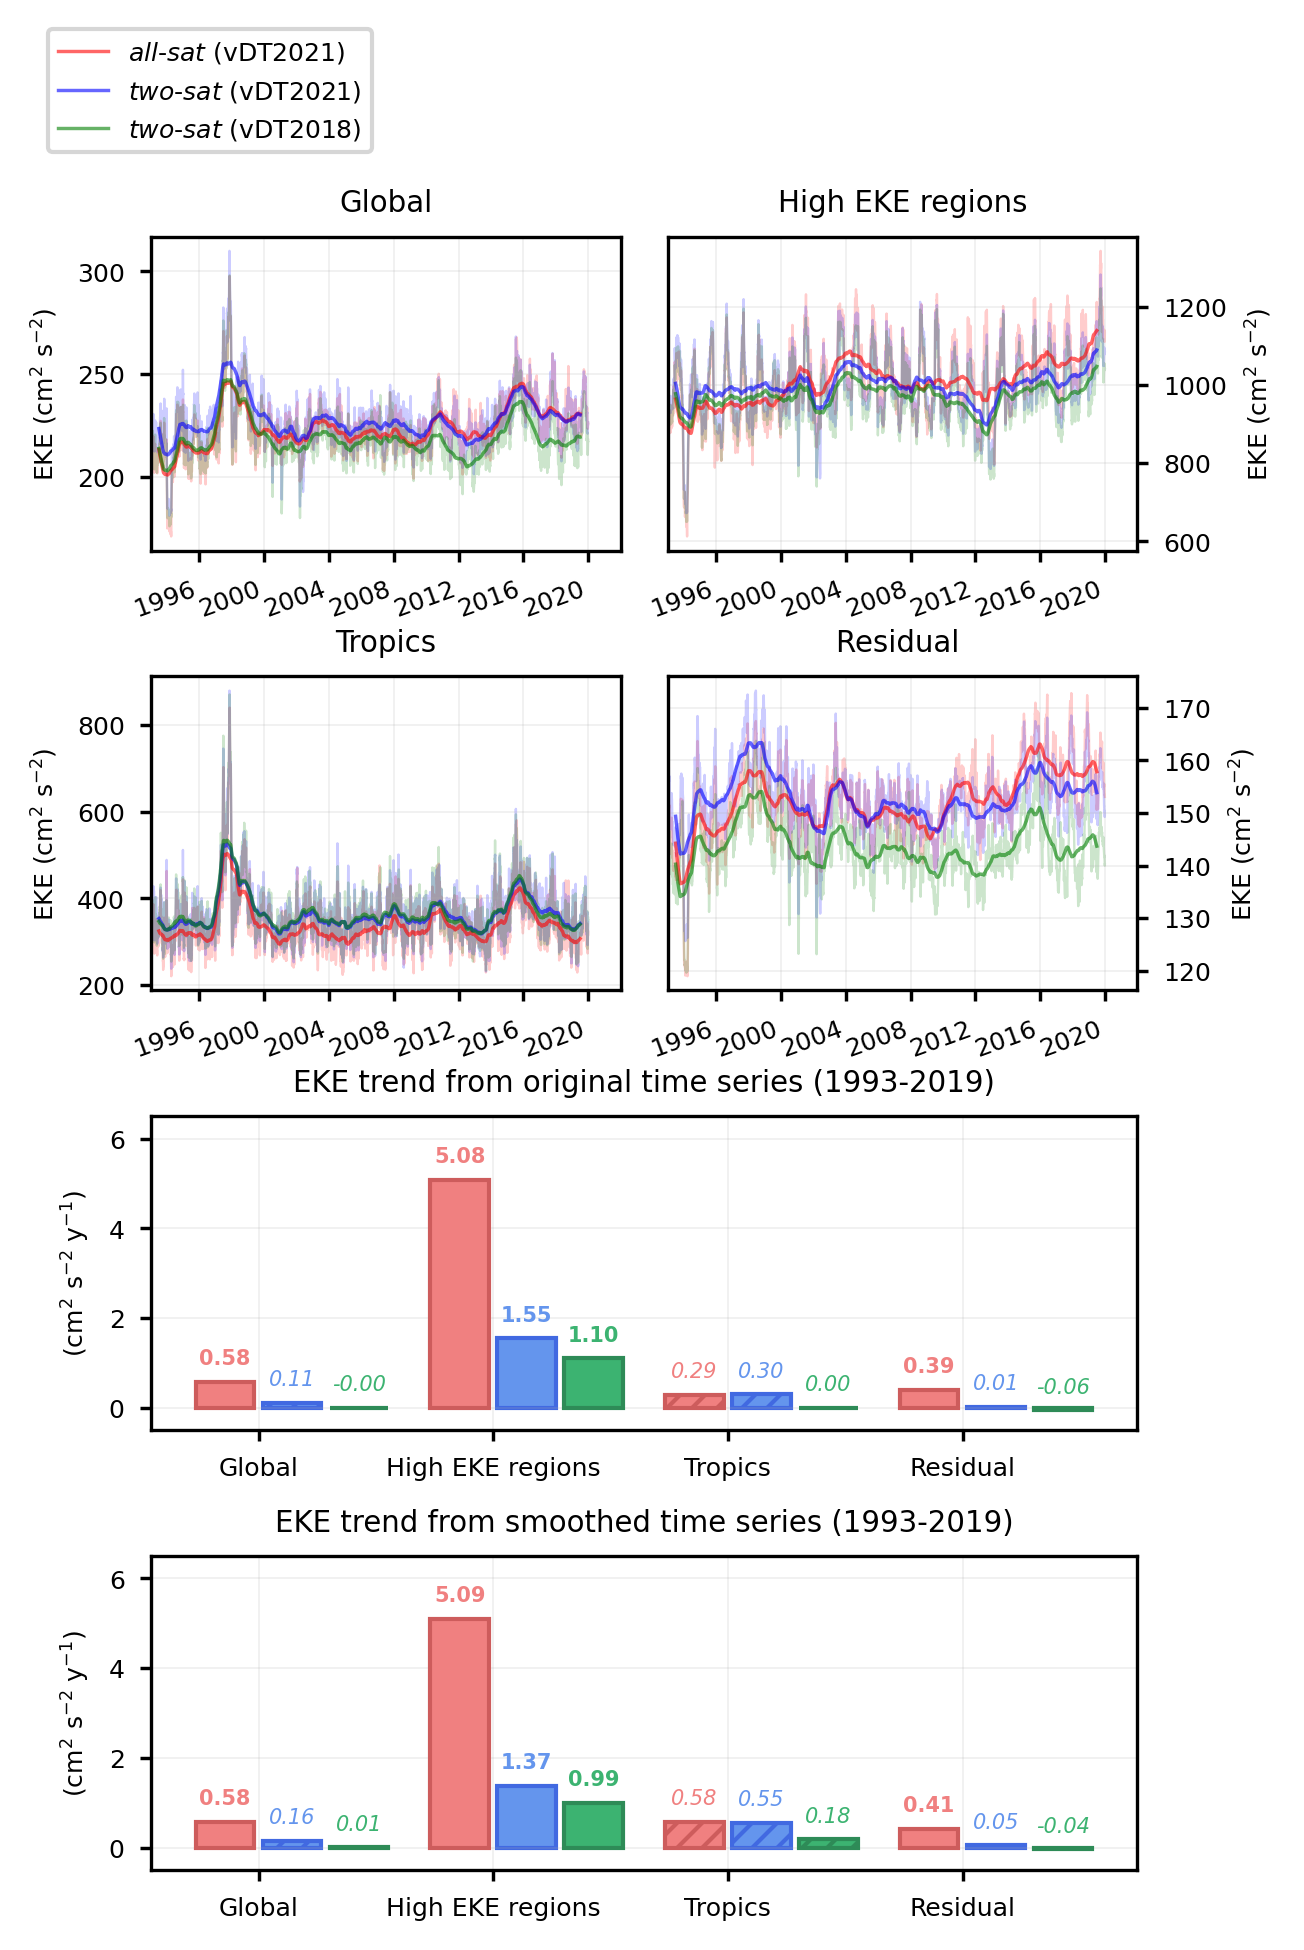

In [12]:
    fs = np.sqrt(fig_size)

    fig = plt.figure(figsize=(np.sqrt(ratio*fig_size),
                              np.sqrt(fig_size/ratio)),
                     dpi=300)

    gs = mpl.gridspec.GridSpec(4, 2, figure=fig,
                              height_ratios=[1, 1, 1, 1])
    
    ax = [[None]*2 for _ in range(4)]

    fig.subplots_adjust(hspace=0.4, wspace=0.1)

    k = 0
    for i in range(2):
        for j in range(2):
            ax[i][j] = fig.add_subplot(gs[i, j])
            if j == 1:
                ax[i][j].yaxis.tick_right()
                ax[i][j].yaxis.set_label_position("right")
            ax[i][j].grid(which='major', linewidth=fs*0.015)
            ax[i][j].xaxis.set_tick_params(which='minor', bottom=False)
            
            
            ax[i][j].tick_params(axis='both', which='major',
                                labelsize=text_size*fs,
                                size=fs*0.5,
                                width=fs*0.15)

            # ----- ALL-SAT vDT2021 (CMEMS) -----
            
            all_ts = tseries['ALL_SAT'][dic_keys[k]]
            #365 day rolling mean 
            all_ts_roll = all_ts.rolling(time=365, center=True).mean()
            all_ts_roll.plot(color='r',
                        alpha=0.6,
                        label='ALL SAT',
                        linewidth=fs*lw,
                        ax=ax[i][j])
            all_ts.plot(color='r',
                    alpha=0.2,
                    linewidth=fs*lw*0.7,
                    ax=ax[i][j],
                    zorder=0)

            # ----- TWO-SAT vDT2021 (CMEMS) -----
            
            two_ts = tseries['TWO_SAT'][dic_keys[k]]
            two_ts_roll = two_ts.rolling(time=365, center=True).mean()
            two_ts_roll.plot(color='b',
                        alpha=0.6,
                        label='TWO SAT',
                        linewidth=fs*lw,
                        ax=ax[i][j])            
            two_ts.plot(color='b',
                    alpha=0.2,
                    linewidth=fs*lw*0.7,
                    ax=ax[i][j],
                    zorder=0)          
            
            # ----- TWO-SAT vDT2018 (C3S) -----
            color18 = 'g'#'g'
            two_ts = tseries['TWO_SAT_C3S_vDT2018'][dic_keys[k]]
            two_ts_roll = two_ts.rolling(time=365, center=True).mean()
            two_ts_roll.plot(color=color18,
                        alpha=0.6,
                        label='TWO SAT (vDT2018)',
                        linewidth=fs*lw,
                        ax=ax[i][j])            
            two_ts.plot(color=color18,
                    alpha=0.2,
                    linewidth=fs*lw*0.7,
                    ax=ax[i][j],
                    zorder=0)   
            
            
            ax[i][j].set_xlabel('', fontsize=1*text_size*fs)
            ax[i][j].set_ylabel(r'EKE (cm$^{{2}}$ s$^{{-2}}$)', fontsize=1*text_size*fs)
            start_date = pd.to_datetime('01-01-1993')
            end_date = pd.to_datetime('12-31-2021')
            
            ax[i][j].set_xlim(start_date, end_date)

            ax[i][j].set_title(titles[k], fontsize=text_size*fs+1)
            plt.xticks(rotation=20)

            k+=1

    red_line = mlines.Line2D([], [], color='red', alpha=0.6,
                            label=r'$\it{all}$-$\it{sat}$ (vDT2021)', lw=lw*fs)
    blue_line = mlines.Line2D([], [], color='blue', alpha=0.6,
                            label=r'$\it{two}$-$\it{sat}$ (vDT2021)', lw=lw*fs)
    green_line = mlines.Line2D([], [], color='g', alpha=0.6,
                            label=r'$\it{two}$-$\it{sat}$ (vDT2018)', lw=lw*fs)    
    # legend 
    l1 = ax[0][0].legend(handles=[red_line, blue_line, green_line],
                        loc='upper center', fontsize=text_size*fs, #+1,
                        bbox_to_anchor=(0.125,1.7)) #1.4))
    
    """
    Generating bar plot  with the trends of each time series
    ---------- from original time series ----------
    """
    ax[2][0] = fig.add_subplot(gs[2, :])
    ax[2][0].grid(which='major', linewidth=fs*0.015)
    ax[2][0].xaxis.set_tick_params(which='minor', bottom=False)
    ax[2][0].tick_params(axis='both', which='major',
                             labelsize=text_size*fs,
                             size=fs*0.5,
                             width=fs*0.15)
    ax[2][0].set_xticks([0, 1, 2, 3])
    tick_labels = ['Global', 'High EKE regions', 'Tropics', 'Residual']
    ax[2][0].set_xticklabels(tick_labels, size=text_size*fs) #+1)  
     
    # ////////////// BARS //////////////  
    
    # ----- ALL-SAT vDT2021 (CMEMS) -----    
    plot_utils.plot_bar(x + ofset, list_slope_all21raw, ax[2][0], wdth, 
                    text_size, fs,  hatchs=mask_nonsig_all21raw,  
                        kind='all_sat')
    
    # ----- TWO-SAT vDT2021 (CMEMS) -----
    plot_utils.plot_bar(x - ofset, list_slope_two21raw, ax[2][0], wdth, 
                    text_size, fs, hatchs=mask_nonsig_two21raw,  
                        kind='two_sat')
    
    # ----- TWO-SAT vDT2018 (C3S) -----
    plot_utils.plot_bar(x - 3*ofset, list_slope_two18raw, ax[2][0], wdth, 
                    text_size, fs, hatchs=mask_nonsig_two18raw,  
                        kind='two_sat18')
    
    # ////////////// TREND TEXT ON TOP OF BARS //////////////  
    
    # ----- ALL-SAT vDT2021 (CMEMS) ----- 
    for i, num in enumerate(list_slope_all21raw):
        ax[2][0].text(x[i] + ofset, 
                list_slope_all21raw[i]+text_size*fs/20, 
                f'{num:.02f}',
                fontsize=text_size*fs-1, 
                ha='center', va='bottom', color='lightcoral',
                style=text_style_all21raw[i],
                weight='bold' if text_style_all21raw[i] == 'normal' else 'normal')

    # ----- TWO-SAT vDT2021 (CMEMS) -----
    for i, num in enumerate(list_slope_two21raw):
        ax[2][0].text(x[i] - ofset, 
                list_slope_two21raw[i]+text_size*fs/20, 
                f'{num:.02f}',
                fontsize=text_size*fs-1, 
                ha='center', va='bottom', color='cornflowerblue',
                style=text_style_two21raw[i],
                weight='bold' if text_style_two21raw[i] == 'normal' else 'normal')

    # ----- TWO-SAT vDT2018 (C3S) -----
    for i, num in enumerate(list_slope_two18raw):
        ax[2][0].text(x[i] - 3*ofset, 
                list_slope_two18raw[i]+text_size*fs/20, 
                f'{num:.02f}',
                fontsize=text_size*fs-1, 
                ha='center', va='bottom', color='mediumseagreen',
                style=text_style_two18raw[i],
                weight='bold' if text_style_two18raw[i] == 'normal' else 'normal')
        
        
    ax[2][0].set_ylim(-0.5, 6.5)
        
    ax[2][0].set_ylabel(label_unit,
                        fontsize=text_size*fs)

    ax[2][0].set_title('EKE trend from original time series (1993-2019)',
                        fontsize=text_size*fs+1)   
    
    # Create legends for bar plots
    colors = ['lightcoral', 'cornflowerblue', 'mediumseagreen']
    categories = [r'$\it{all}$-$\it{sat}$ (vDT2021)', 
                  r'$\it{two}$-$\it{sat}$ (vDT2021)',
                  r'$\it{two}$-$\it{sat}$ (vDT2018)']

    legend_patches = [Patch(facecolor=color, label=category) for
                      color, category in zip(colors, categories)]   

    
    """
    Generating bar plot  with the trends of each time series
    ---------- from roll-mean time series ----------
    """
    ax[3][0] = fig.add_subplot(gs[3, :])
    ax[3][0].grid(which='major', linewidth=fs*0.015)
    ax[3][0].xaxis.set_tick_params(which='minor', bottom=False)
    ax[3][0].tick_params(axis='both', which='major',
                             labelsize=text_size*fs,
                             size=fs*0.5,
                             width=fs*0.15)
    ax[3][0].set_xticks([0, 1, 2, 3])
    tick_labels = ['Global', 'High EKE regions', 'Tropics', 'Residual']
    ax[3][0].set_xticklabels(tick_labels, size=text_size*fs) #+1)  
     
    # ////////////// BARS //////////////  
    
    # ----- ALL-SAT vDT2021 (CMEMS) -----    
    plot_utils.plot_bar(x + ofset, list_slope_all21rol, ax[3][0], wdth, 
                    text_size, fs,  hatchs=mask_nonsig_all21rol,  
                        kind='all_sat')
    
    # ----- TWO-SAT vDT2021 (CMEMS) -----
    plot_utils.plot_bar(x - ofset, list_slope_two21rol, ax[3][0], wdth, 
                    text_size, fs, hatchs=mask_nonsig_two21rol,  
                        kind='two_sat')
    
    # ----- TWO-SAT vDT2018 (C3S) -----
    plot_utils.plot_bar(x - 3*ofset, list_slope_two18rol, ax[3][0], wdth, 
                    text_size, fs, hatchs=mask_nonsig_two18rol,  
                        kind='two_sat18')
    
    # ////////////// TREND TEXT ON TOP OF BARS //////////////  
    
    # ----- ALL-SAT vDT2021 (CMEMS) ----- 
    for i, num in enumerate(list_slope_all21rol):
        ax[3][0].text(x[i] + ofset, 
                list_slope_all21rol[i]+text_size*fs/20, 
                f'{num:.02f}',
                fontsize=text_size*fs-1, 
                ha='center', va='bottom', color='lightcoral',
                style=text_style_all21rol[i],
                weight='bold' if text_style_all21rol[i] == 'normal' else 'normal')

    # ----- TWO-SAT vDT2021 (CMEMS) -----
    for i, num in enumerate(list_slope_two21rol):
        ax[3][0].text(x[i] - ofset, 
                list_slope_two21rol[i]+text_size*fs/20, 
                f'{num:.02f}',
                fontsize=text_size*fs-1, 
                ha='center', va='bottom', color='cornflowerblue',
                style=text_style_two21rol[i],
                weight='bold' if text_style_two21rol[i] == 'normal' else 'normal')

    # ----- TWO-SAT vDT2018 (C3S) -----
    for i, num in enumerate(list_slope_two18rol):
        ax[3][0].text(x[i] - 3*ofset, 
                list_slope_two18rol[i]+text_size*fs/20, 
                f'{num:.02f}',
                fontsize=text_size*fs-1, 
                ha='center', va='bottom', color='mediumseagreen',
                style=text_style_two18rol[i],
                weight='bold' if text_style_two18rol[i] == 'normal' else 'normal')
        
        
    ax[3][0].set_ylim(-0.5, 6.5)
        
    ax[3][0].set_ylabel(label_unit,
                        fontsize=text_size*fs)

    ax[3][0].set_title('EKE trend from smoothed time series (1993-2019)',
                        fontsize=text_size*fs+1)   
    
    # Create legends for bar plots
    colors = ['lightcoral', 'cornflowerblue', 'mediumseagreen']
    categories = [r'$\it{all}$-$\it{sat}$ (vDT2021)', 
                  r'$\it{two}$-$\it{sat}$ (vDT2021)',
                  r'$\it{two}$-$\it{sat}$ (vDT2018)']

    legend_patches = [Patch(facecolor=color, label=category) for
                      color, category in zip(colors, categories)]
    
    # ------
    
    savepath = f'../../figures/Fig_S3_including_vDT2018_roll_data_1993to2019.{extension}'

    dir_path = os.path.dirname(os.path.realpath(savepath))+'/'
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)

    plt.savefig(savepath, dpi=300, bbox_inches='tight')

